In [ ]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DLMAssignment2/poker-hand-training-true.data', header= None, sep=',', quoting= 3, error_bad_lines= True )
df.columns = ['S1', 'C1','S2', 'C2','S3', 'C3','S4', 'C4','S5', 'C5','Label']
df.to_csv('/content/drive/MyDrive/Colab Notebooks/DLMAssignment2/poker-hand-training-true.csv', index = None)
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DLMAssignment2/poker-hand-testing.data', header= None, sep=',',)
df2.columns = ['S1', 'C1','S2', 'C2','S3', 'C3','S4', 'C4','S5', 'C5','Label']
df.head()
df2.head()
display(df.info())
display(df.describe())
print(df.shape)
print(df2.shape)
X_train = df.loc[:,df.columns != 'Label']
X_test = df2.loc[:,df2.columns != 'Label']
Y_train = df['Label']
Y_test = df2['Label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25010 entries, 0 to 25009
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   S1      25010 non-null  int64
 1   C1      25010 non-null  int64
 2   S2      25010 non-null  int64
 3   C2      25010 non-null  int64
 4   S3      25010 non-null  int64
 5   C3      25010 non-null  int64
 6   S4      25010 non-null  int64
 7   C4      25010 non-null  int64
 8   S5      25010 non-null  int64
 9   C5      25010 non-null  int64
 10  Label   25010 non-null  int64
dtypes: int64(11)
memory usage: 2.1 MB


None

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Label
count,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000
mean,2.508756,6.995242,2.497721,7.014194,2.510236,7.014154,2.495922,6.942463,2.497321,6.962735,0.621152
std,1.116483,3.749805,1.121767,3.766974,1.123148,3.744974,1.116009,3.747147,1.118732,3.741579,0.788361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,1.000000
75%,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,3.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


(25010, 11)
(1000000, 11)


In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
Y_train.groupby(Y_train).size()

Label
0    12493
1    10599
2     1206
3      513
4       93
5       54
6       36
7        6
8        5
9        5
Name: Label, dtype: int64

In [ ]:
!pip install pandas-profiling[notebook,html]
from pandas_profiling import ProfileReport
# profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True) 
# profile.to_file(output_file = "F:\poker_report.html")
# profile.to_widgets()

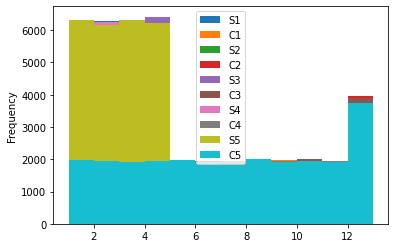

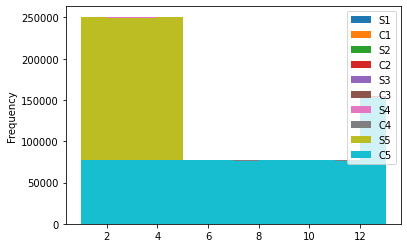

In [ ]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
# plt.hist(df.loc[:,df.columns != 'Label'].values)
# plt.hist(df[:10].values)
dfnew = df.loc[:,df.columns != 'Label']

df2new = df2.loc[:,df2.columns != 'Label']
ax = dfnew.plot.hist(bins=12, alpha=1)
# plt.show()
ax2 = df2new.plot.hist(bins=12, alpha=1)
# plt.show()

{0: 12493, 1: 10599, 2: 1206, 3: 513, 4: 93, 5: 54, 6: 36, 7: 6, 8: 5, 9: 5}
Nothing in hand: 12493
One pair: 10599
Two pairs: 1206
Three of a kind: 513
Straight: 93
Flush: 54
Full house: 36
Four of a kind: 6
Straight flush: 5
Royal flush: 5


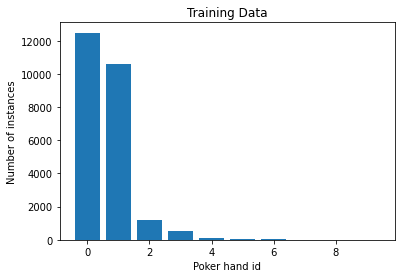

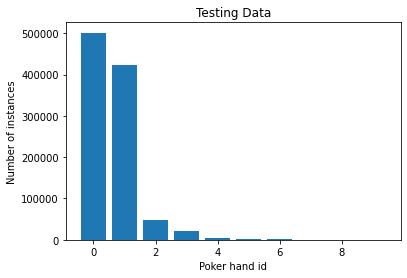

In [ ]:
nb_classes = 10  # we have 10 classes of poker hands
cls = {}
cls_test = {}
for i in range(nb_classes):
    cls[i] = len(df[df.Label==i])
    cls_test[i] = len(df2[df2.Label==i])

print(cls)
hand_name = {
    0: 'Nothing in hand',
    1: 'One pair',
    2: 'Two pairs',
    3: 'Three of a kind',
    4: 'Straight',
    5: 'Flush',
    6: 'Full house',
    7: 'Four of a kind',
    8: 'Straight flush',
    9: 'Royal flush',
}
poker_hands = (np.unique(Y_train))
for i in poker_hands:
    print("%s: %d" % (hand_name[i], cls[i]))

plt.bar(poker_hands, [cls[i] for i in poker_hands], align='center')
plt.xlabel('Poker hand id')
plt.ylabel('Number of instances')
plt.title("Training Data")
plt.show()

plt.bar(poker_hands, [cls_test[i] for i in poker_hands], align='center')
plt.xlabel('Poker hand id')
plt.ylabel('Number of instances')
plt.title("Testing Data")
plt.show()

In [ ]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(25010, 10) (1000000, 10) (25010,) (1000000,)


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras import regularizers
model = Sequential()
model.add(Dense(15, activation='relu', input_dim=10))
model.add(Dense(15, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs = 10, verbose=1,validation_data=(X_test,Y_test),shuffle=True)
score = model.evaluate(X_test, Y_test)

Epoch 1/10
782/782 [==============================] - 26s 34ms/step - loss: 1.5142 - accuracy: 0.1204 - val_loss: 1.4633 - val_accuracy: 0.1255
Epoch 2/10
782/782 [==============================] - 27s 34ms/step - loss: 1.4713 - accuracy: 0.1334 - val_loss: 1.4612 - val_accuracy: 0.1415
Epoch 3/10
782/782 [==============================] - 25s 32ms/step - loss: 1.4704 - accuracy: 0.1054 - val_loss: 1.4609 - val_accuracy: 0.0821
Epoch 4/10
782/782 [==============================] - 25s 32ms/step - loss: 1.4702 - accuracy: 0.0890 - val_loss: 1.4609 - val_accuracy: 0.0821
Epoch 5/10
782/782 [==============================] - 25s 32ms/step - loss: 1.4702 - accuracy: 0.0952 - val_loss: 1.4609 - val_accuracy: 0.0930
Epoch 6/10
782/782 [==============================] - 25s 31ms/step - loss: 1.4702 - accuracy: 0.1011 - val_loss: 1.4609 - val_accuracy: 0.0677
Epoch 7/10
782/782 [==============================] - 25s 32ms/step - loss: 1.4702 - accuracy: 0.1180 - val_loss: 1.4609 - val_accuracy:

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)
kmeans.labels_
kmeans.predict(X_test)
kmeans.cluster_centers_

array([[ 2.52146213,  6.96296886,  2.50059728, 10.25547503,  2.50242892,
         6.69212391,  2.4898463 ,  6.83515171,  2.49024449,  6.91407183],
       [ 2.49594475,  7.02778447,  2.49482053,  3.74584437,  2.51810809,
         7.33887417,  2.5020477 ,  7.05067052,  2.50445676,  7.01180438]])

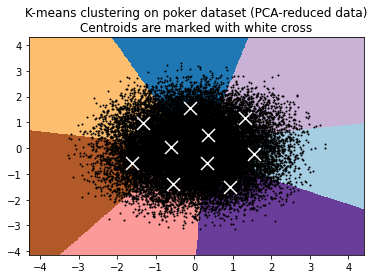

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
n_digits = len(np.unique(Y_train))

# Scale the Data to Make the NN easier to converge
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)  
# Transform the training and testing data
data_train = scaler.transform(X_train)
data_test = scaler.transform(X_test)

# data = scale(X_train)

#kmeans plot to check for outliers
reduced_data = PCA(n_components=2).fit_transform(data_train)
reduced_data_test = PCA(n_components=2).fit_transform(data_test)
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on poker dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())
plt.show()

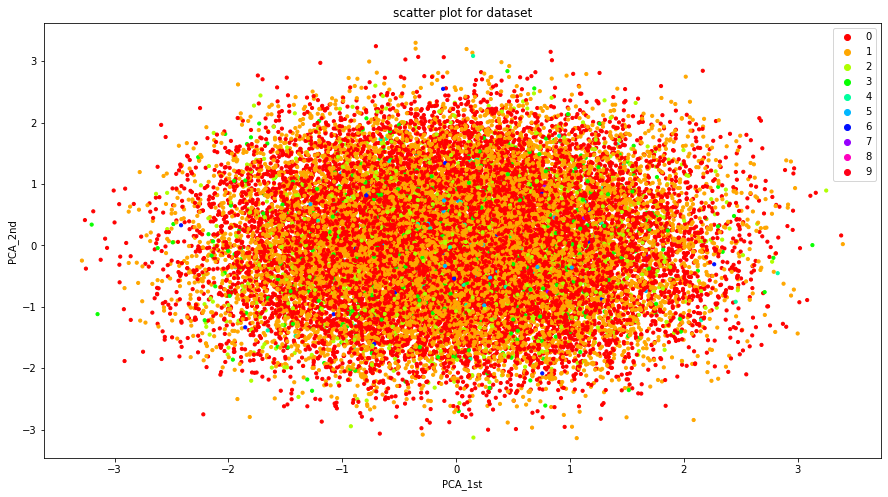

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x=np.zeros(25010)
y=np.zeros(25010)
plt.figure(figsize=(15,8))
x=reduced_data[:,0]
y=reduced_data[:,1]
scatter = plt.scatter(x,y,c=Y_train,cmap=plt.cm.get_cmap("hsv",(10)),marker="o", s=10)
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8','9']
plt.legend(handles=scatter.legend_elements()[0], labels=classes,loc="best")
# plt.add_artist(legend)
# plt.colorbar(ticks=range(10))
plt.xlabel("PCA_1st")
plt.ylabel("PCA_2nd")
plt.title("scatter plot for dataset")
plt.show()

In [ ]:
!pip install matplotlib

In [ ]:
from mlxtend.plotting import plot_decision_regions
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
enc = OneHotEncoder()
# Y_train = enc.fit_transform(np.array(Y_train).reshape(-1,1)).toarray()
# Y_test = enc.fit_transform(np.array(Y_test).reshape(-1,1)).toarray()
clf3 = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100,100,100), activation = 'tanh', random_state=1, learning_rate_init=0.02,max_iter=2000)
clf3.fit(data_train, Y_train)
ypred_tr = clf3.predict(data_train)
ypred_te = clf3.predict(data_test)
# acc = accuracy_score(Y_test, ypred_te)
train_accuracy = clf3.score(data_train, Y_train)
test_accuracy= clf3.score(data_test, Y_test)
# train_accuracy = clf3.score(reduced_data, Y_train)
# test_accuracy= clf3.score(reduced_data_test, Y_test)
print("Test accuracy : ", test_accuracy)
print("Train accuracy : ", train_accuracy)
print(classification_report(Y_test,ypred_te))
print(confusion_matrix(Y_test, ypred_te))


Test accuracy :  0.582404
Train accuracy :  0.5984806077568973
              precision    recall  f1-score   support

           0       0.64      0.74      0.69    501209
           1       0.54      0.48      0.51    422498
           2       0.17      0.18      0.17     47622
           3       0.65      0.10      0.17     21121
           4       0.11      0.00      0.00      3885
           5       0.19      0.01      0.03      1996
           6       0.09      0.01      0.02      1424
           7       0.05      0.15      0.07       230
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         3

    accuracy                           0.58   1000000
   macro avg       0.24      0.17      0.17   1000000
weighted avg       0.57      0.58      0.57   1000000

[[369076 128897   3110     38      6     82      0      0      0      0]
 [187250 202855  31641    607     37     29     23     55      1      0]
 [ 10307  28679   8356    225   

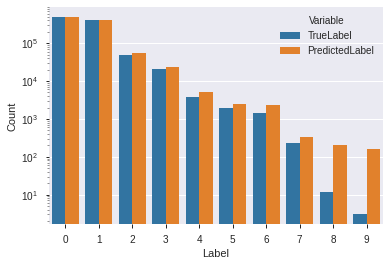

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
alg = DecisionTreeClassifier(random_state=1)
alg.fit(X_train, Y_train)
y_pred = alg.predict(X_test)
accuracy_score(Y_test, y_pred, normalize=True)

pred_series = pd.Series(y_pred).groupby(y_pred).size()
true_series = pd.Series(Y_test.values).groupby(Y_test).size()
pred_res = pd.DataFrame()
pred_res['TrueLabel'] = true_series
pred_res['PredictedLabel'] = pred_series
f, ax = plt.subplots()
ax.set(yscale="log")
sns.barplot(data=pred_res.stack().reset_index().rename(columns={0: 'Count', 'level_1': 'Variable'}), x='Label', y='Count', hue='Variable')


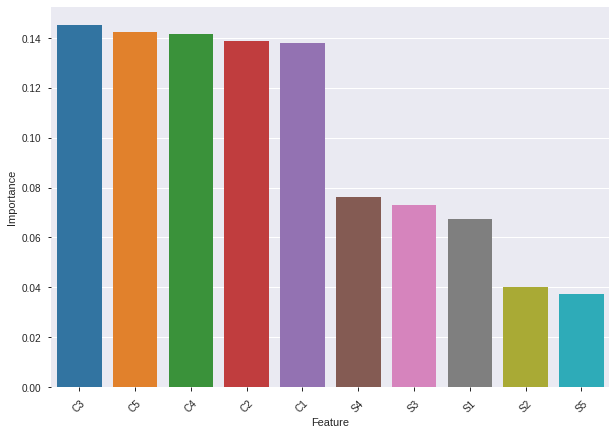

In [ ]:
%matplotlib inline
#check for feature importance
feature_imp = pd.DataFrame(sorted(zip(X_train.columns, alg.feature_importances_), key=lambda k: k[1], reverse=True))
feature_imp.columns = ['Feature', 'Importance']

f, ax = plt.subplots(figsize=(10, 7))
# ax.set(yscale="log")
plt.xticks(rotation=45)
sns.barplot(data=feature_imp, x='Feature', y='Importance')

In [ ]:
!pip install kora
import kora.install.py38

     |████████████████████████████████| 61kB 3.1MB/s 
     |████████████████████████████████| 61kB 6.4MB/s 
https://d28172f81701.ngrok.io


In [ ]:
# check for missing values
import seaborn as sns
%matplotlib inline
mask = df.isna().any()
list_col = df.columns[mask].tolist()
# sns.heatmap(df[list_col].isnull())

In [ ]:
list_col

[]

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import KFold, train_test_split, StratifiedKFold


models = [BaggingClassifier(), RandomForestClassifier(), AdaBoostClassifier(), 
          KNeighborsClassifier(),GaussianNB(),tree.DecisionTreeClassifier(),
          svm.SVC(kernel='linear', C=1),
            OneVsRestClassifier(svm.SVC(kernel='linear'))]

model_names = ["Bagging with DT", "Random Forest", "AdaBoost", "KNN","Naive Bayes","Decision Tree",
               "Linear SVM","OneVsRestClassifier with Linear SVM"]

for model,name in zip(models,model_names):
  model.fit(data_train, Y_train)
  # Display the relative importance of each attribute
  if name == "Random Forest":
      print(model.feature_importances_)   
  #Predict
  prediction = model.predict(data_test)
  # Print Accuracy
  acc = accuracy_score(Y_test, prediction)
  print("Accuracy Using",name,": " + str(acc)+'\n')
  print(classification_report(Y_test,prediction))
  print(confusion_matrix(Y_test, prediction))


Accuracy Using Bagging with DT : 0.588376

              precision    recall  f1-score   support

           0       0.62      0.77      0.68    501209
           1       0.55      0.48      0.51    422498
           2       0.25      0.03      0.05     47622
           3       0.45      0.03      0.06     21121
           4       0.14      0.00      0.01      3885
           5       0.24      0.00      0.01      1996
           6       0.00      0.00      0.00      1424
           7       1.00      0.00      0.01       230
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         3

    accuracy                           0.59   1000000
   macro avg       0.32      0.13      0.13   1000000
weighted avg       0.56      0.59      0.56   1000000

[[383963 116694    446     65     19     19      0      0      2      1]
 [216598 202362   2926    521     75      6      8      0      1      1]
 [ 14735  31370   1325    168     17      0      7  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.64      0.81      0.71    501209
           1       0.58      0.50      0.53    422498
           2       0.40      0.00      0.01     47622
           3       0.49      0.00      0.00     21121
           4       0.27      0.00      0.00      3885
           5       1.00      0.00      0.01      1996
           6       0.00      0.00      0.00      1424
           7       0.00      0.00      0.00       230
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         3

    accuracy                           0.62   1000000
   macro avg       0.34      0.13      0.13   1000000
weighted avg       0.60      0.62      0.58   1000000

[[405632  95565     10      1      1      0      0      0      0      0]
 [212416 209852    190     28     10      0      2      0      0      0]
 [ 12048  35381    176     15      0      0      2      0      0      0]
 [  3478  17548     42

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.50      0.98      0.66    501209
           1       0.00      0.00      0.00    422498
           2       0.00      0.00      0.00     47622
           3       0.00      0.00      0.00     21121
           4       0.00      0.00      0.00      3885
           5       0.00      0.00      0.00      1996
           6       0.00      0.00      0.00      1424
           7       0.00      0.00      0.00       230
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         3

    accuracy                           0.49   1000000
   macro avg       0.05      0.10      0.07   1000000
weighted avg       0.25      0.49      0.33   1000000

[[491576      0      0      0      0      0      0      0      0   9633]
 [414414      0      0      0      0      0      0      0      0   8084]
 [ 46709      0      0      0      0      0      0      0      0    913]
 [ 20729      0      0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.55      0.66      0.60    501209
           1       0.46      0.42      0.44    422498
           2       0.16      0.01      0.02     47622
           3       0.11      0.01      0.01     21121
           4       0.04      0.00      0.00      3885
           5       0.58      0.02      0.04      1996
           6       0.00      0.00      0.00      1424
           7       0.00      0.00      0.00       230
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         3

    accuracy                           0.51   1000000
   macro avg       0.19      0.11      0.11   1000000
weighted avg       0.48      0.51      0.49   1000000

[[331578 168515    883    197     15     21      0      0      0      0]
 [240298 179460   2025    621     79     12      2      0      0      1]
 [ 23707  23080    626    182     25      0      1      0      1      0]
 [  8406  12283    296

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67    501209
           1       0.00      0.00      0.00    422498
           2       0.00      0.00      0.00     47622
           3       0.00      0.00      0.00     21121
           4       0.00      0.00      0.00      3885
           5       0.00      0.00      0.00      1996
           6       0.00      0.00      0.00      1424
           7       0.00      0.00      0.00       230
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         3

    accuracy                           0.50   1000000
   macro avg       0.05      0.10      0.07   1000000
weighted avg       0.25      0.50      0.33   1000000

[[501209      0      0      0      0      0      0      0      0      0]
 [422498      0      0      0      0      0      0      0      0      0]
 [ 47622      0      0      0      0      0      0      0      0      0]
 [ 21121      0      0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67    501209
           1       0.00      0.00      0.00    422498
           2       0.00      0.00      0.00     47622
           3       0.00      0.00      0.00     21121
           4       0.00      0.00      0.00      3885
           5       0.00      0.00      0.00      1996
           6       0.00      0.00      0.00      1424
           7       0.00      0.00      0.00       230
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         3

    accuracy                           0.50   1000000
   macro avg       0.05      0.10      0.07   1000000
weighted avg       0.25      0.50      0.33   1000000

[[501209      0      0      0      0      0      0      0      0      0]
 [422498      0      0      0      0      0      0      0      0      0]
 [ 47622      0      0      0      0      0      0      0      0      0]
 [ 21121      0      0